In [7]:
from google.colab import files
uploaded = files.upload()

<ipython-input-5-d6d7e6bd2468>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-5-d6d7e6bd2468>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

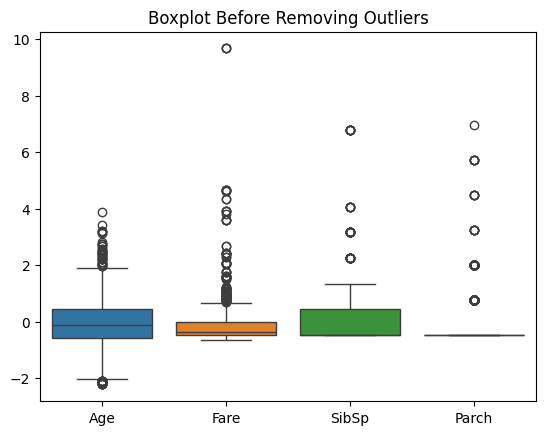

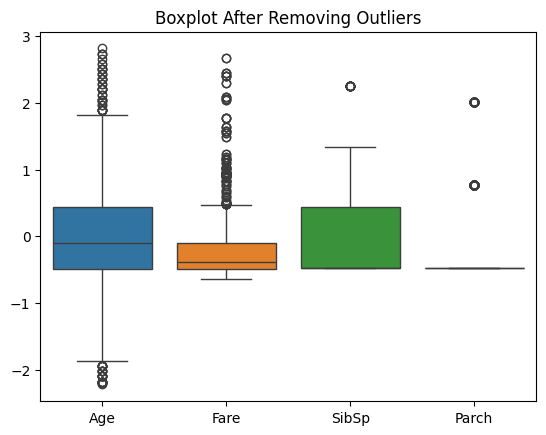

✅ Data cleaning complete. Cleaned dataset saved as 'Titanic-Cleaned.csv'.


In [ ]:
# Titanic Data Cleaning & Preprocessing
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load Dataset
df = pd.read_csv("Titanic-Dataset.csv")  # for Google Colab
 # Make sure the CSV file is in the same directory

# Step 2: Handle Missing Values
df['Age'].fillna(df['Age'].median(), inplace=True)
df.drop(columns=['Cabin'], inplace=True)  # Drop Cabin due to too many nulls
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Step 3: Encode Categorical Features
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])         # male = 1, female = 0
df['Embarked'] = le.fit_transform(df['Embarked'])  # S=2, C=0, Q=1
df.drop(columns=['Name', 'Ticket'], inplace=True)  # Drop non-informative features

# Step 4: Standardize Numerical Features
scaler = StandardScaler()
num_features = ['Age', 'Fare', 'SibSp', 'Parch']
df[num_features] = scaler.fit_transform(df[num_features])

# Step 5: Visualize and Remove Outliers
# Optional: Visualize before removing
sns.boxplot(data=df[num_features])
plt.title("Boxplot Before Removing Outliers")
plt.show()

# Remove outliers using Z-score
df = df[(np.abs(stats.zscore(df[num_features])) < 3).all(axis=1)]

# Optional: Visualize after removing
sns.boxplot(data=df[num_features])
plt.title("Boxplot After Removing Outliers")
plt.show()

# Save cleaned dataset
df.to_csv("Titanic-Cleaned.csv", index=False)
print("✅ Data cleaning complete. Cleaned dataset saved as 'Titanic-Cleaned.csv'.")


In [ ]:
from google.colab import files
files.download("Titanic-Cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>